## 數據加載與探索

In [2]:
## 載入並探索資料集

import pandas as pd

# 讀取 CSV 檔案
data = pd.read_csv('text-book/kddcup.data.corrected.csv')

print("=== 數據集基本信息 ===")
print(f"數據形狀: {data.shape}")
print(f"特徵數量: {data.shape[1]}")
print(f"樣本數量: {data.shape[0]}")

print("\n=== 數據前5行 ===")
data.head()

=== 數據集基本信息 ===
數據形狀: (4898431, 42)
特徵數量: 42
樣本數量: 4898431

=== 數據前5行 ===


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


### KDD Cup 99 資料集欄位定義補充說明

KDD Cup 99 資料集每一筆「連線」記錄包含多個特徵，主要分為三大類：

#### 1. 基本連線特徵
- `duration`：連線持續時間（秒）
- `protocol_type`：協定類型（如 tcp, udp, icmp）
- `service`：目的地網路服務（如 http, telnet）
- `flag`：連線狀態（正常或錯誤）
- `src_bytes`：來源到目的地的資料位元組數
- `dst_bytes`：目的地到來源的資料位元組數
- `land`：是否來源與目的地相同（1: 是, 0: 否）
- `wrong_fragment`：錯誤片段數
- `urgent`：緊急封包數

#### 2. 內容特徵
- `hot`：熱指標數量（可疑行為）
- `num_failed_logins`：登入失敗次數
- `logged_in`：是否成功登入（1: 是, 0: 否）
- `num_compromised`：被攻陷條件數
- `root_shell`：是否取得 root shell（1: 是, 0: 否）
- `su_attempted`：是否嘗試 su root（1: 是, 0: 否）
- `num_root`：root 存取次數
- `num_file_creations`：檔案建立操作數
- `num_shells`：shell 提示符數
- `num_access_files`：存取控制檔案操作數
- `num_outbound_cmds`：FTP session 中的外部指令數
- `is_hot_login`：是否屬於熱登入（1: 是, 0: 否）
- `is_guest_login`：是否為 guest 登入（1: 是, 0: 否）

#### 3. 流量特徵（基於時間或主機）
- `count`：過去兩秒內與同一主機的連線數
- `serror_rate`：SYN 錯誤連線比例
- `rerror_rate`：REJ 錯誤連線比例
- `same_srv_rate`：同服務連線比例
- `diff_srv_rate`：不同服務連線比例
- `srv_count`：過去兩秒內與同一服務的連線數
- `srv_serror_rate`：同服務 SYN 錯誤比例
- `srv_rerror_rate`：同服務 REJ 錯誤比例
- `srv_diff_host_rate`：同服務不同主機連線比例

---

這些特徵有助於區分正常連線與各類型攻擊（如 DOS、R2L、U2R、Probe），並支援各種入侵偵測模型的訓練與分析。

In [3]:
# 檢查是否有缺失值
print("\n=== 缺失值檢查 ===")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


=== 缺失值檢查 ===
Series([], dtype: int64)


In [4]:
# 檢查是否有非數值型別的特徵
non_numeric_features = data.select_dtypes(exclude=['number']).columns
print("\n=== 非數值型別特徵 ===")
print(non_numeric_features)



=== 非數值型別特徵 ===
Index(['protocol_type', 'service', 'flag', 'label'], dtype='object')


In [5]:
# 其中 label 欄位表示連線是否異常，除了 normal 以外，包含以下類型：
# back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,
# perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
print("\n=== 正常與異常連線數量 ===")
print(data['label'].value_counts())


=== 正常與異常連線數量 ===
label
smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: count, dtype: int64


## 數據型態轉換

In [6]:
# 將 label 欄位轉換為二元標籤：normal 為 0，其他為 1
data['label'] = data['label'].apply(lambda x: 0 if x == 'normal.' else 1)

# 重新取得非數值型欄位（排除已經被轉換的欄位）
non_numeric_features = [col for col in data.columns if data[col].dtype == 'object' and col != 'label']

# 執行 one-hot 編碼
data = pd.get_dummies(data, columns=non_numeric_features)

# 或者使用 Label Encoding
# from sklearn.preprocessing import LabelEncoder

# label_encoders = {}
# for col in non_numeric_features:
#     le = LabelEncoder()
#     data[col] = le.fit_transform(data[col])
#     label_encoders[col] = le

print("\n=== 轉換後的數據前5行 ===")
data


=== 轉換後的數據前5行 ===


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,protocol_type_icmp,...,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0,0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.00,1,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,0,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,2,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,0,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,0,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.00,3,3,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,0,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,0,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.00,4,4,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,0,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,212,2288,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,32,0.0,0.0,0.0,0.0,1.0,0.0,0.16,3,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,0,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4898427,0,219,236,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,33,0.0,0.0,0.0,0.0,1.0,0.0,0.15,4,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,0,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [7]:
print("\n=== 正常與異常連線數量 ===")
print(data['label'].value_counts())


=== 正常與異常連線數量 ===
label
1    3925650
0     972781
Name: count, dtype: int64


In [8]:
# 去重
data = data.drop_duplicates()

In [9]:
print("\n=== 正常與異常連線數量 ===")
print(data['label'].value_counts())


=== 正常與異常連線數量 ===
label
0    812814
1    262169
Name: count, dtype: int64


In [10]:
# 從數據中挑選出 90% 的正常連線及 10% 的異常樣本作為實驗資料
n_normal = 90000
n_anomaly = 10000

normal_data = data[data['label'] == 0].sample(n=n_normal, random_state=42)
anomaly_data = data[data['label'] == 1].sample(n=n_anomaly, random_state=42)

experiment_data = pd.concat([normal_data, anomaly_data]).sample(frac=1, random_state=42).reset_index(drop=True)

print("\n=== 實驗資料正常與異常連線數量, 兩者比例 ===")
print(experiment_data['label'].value_counts(normalize=True))


=== 實驗資料正常與異常連線數量, 兩者比例 ===
label
0    0.9
1    0.1
Name: proportion, dtype: float64


## 特徵選擇（Feature Selection）與資料分析

在高維度資料中，並非所有特徵都對異常偵測有幫助。
本單元示範如何利用單變量統計方法（如 ANOVA F-value）進行特徵選擇，只保留最具區辨力的前 10% 特徵，
這有助於提升模型效能並加速訓練。

特徵選擇步驟：
- 先將標籤（label）與特徵分開
- 使用 SelectPercentile + f_classif，根據每個特徵與標籤的關聯性分數進行排序
- 只保留分數最高的特徵進行後續建模

---

## Exploratory Data Analysis (EDA)

本節將針對挑選後的特徵進行進一步分析與視覺化。

In [15]:
# Univariate feature selection
# from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectPercentile, f_classif

X = experiment_data.drop('label', axis=1)
y = experiment_data['label']

# selector = SelectKBest(score_func=f_classif, k=5)
selector = SelectPercentile(score_func=f_classif, percentile=10)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]

print("\n=== 選取的特徵 ===")
print(selected_features)


=== 選取的特徵 ===
Index(['logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate',
       'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'service_http', 'service_private',
       'flag_S0', 'flag_SF'],
      dtype='object')


/Users/jonas/.pyenv/versions/anomalyebook-3.11.11/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [16 17 44 63 66 68 86] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/jonas/.pyenv/versions/anomalyebook-3.11.11/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [16]:
# 只保留選取的特徵
experiment_data = experiment_data[selected_features.tolist() + ['label']]

In [17]:
# 將實驗資料隨機分為訓練集與測試集（80% 訓練，20% 測試）
from sklearn.model_selection import train_test_split

X = experiment_data.drop(columns=['label'])
y = experiment_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n=== 訓練集與測試集大小 ===")
print(f"訓練集大小: {X_train.shape}, 測試集大小: {X_test.shape}")


=== 訓練集與測試集大小 ===
訓練集大小: (80000, 13), 測試集大小: (20000, 13)


In [18]:
print("\n=== 訓練集正常與異常連線數量, 兩者比例 ===")
print(y_train.value_counts(normalize=True))


=== 訓練集正常與異常連線數量, 兩者比例 ===
label
0    0.89965
1    0.10035
Name: proportion, dtype: float64


In [19]:
print("\n=== 測試集正常與異常連線數量, 兩者比例 ===")
print(y_test.value_counts(normalize=True))


=== 測試集正常與異常連線數量, 兩者比例 ===
label
0    0.9014
1    0.0986
Name: proportion, dtype: float64


In [20]:
from sklearn.preprocessing import StandardScaler

# 不對數據進行標準化, 但為了不改動後面的代碼, 仍然建立標準化的變數
# X_train_scaled = X_train.copy()
# X_test_scaled = X_test.copy()

# 對數據進行標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n=== 標準化後的數據形狀 ===")
print(f"訓練集形狀: {X_train_scaled.shape}, 測試集形狀: {X_test_scaled.shape}")


=== 標準化後的數據形狀 ===
訓練集形狀: (80000, 13), 測試集形狀: (20000, 13)


In [21]:
print("\n=== 轉換後的數據前5行 ===")
X_train_scaled[:5]


=== 轉換後的數據前5行 ===


array([[ 0.58112233, -0.22757112, -0.29456768, -0.29599139,  0.35283847,
         0.70211673,  0.60157876, -0.29717759, -0.29433849,  0.74967451,
        -0.2955595 , -0.29070686,  0.40091448],
       [-1.72080808,  0.73921181, -0.29456768, -0.29599139,  0.35283847,
         0.53841548,  0.43576456, -0.29717759, -0.29433849, -1.33391223,
        -0.2955595 , -0.29070686,  0.40091448],
       [ 0.58112233, -0.4109265 , -0.29456768, -0.29599139,  0.35283847,
         0.61003478,  0.60157876, -0.29717759, -0.29433849, -1.33391223,
        -0.2955595 , -0.29070686,  0.40091448],
       [-1.72080808, -0.4109265 , -0.29456768, -0.29599139,  0.35283847,
        -0.68934394,  0.60157876, -0.29717759, -0.29433849,  0.74967451,
        -0.2955595 , -0.29070686, -2.49429752],
       [-1.72080808,  0.15580832, -0.29456768, -0.29599139,  0.35283847,
         0.69188541,  0.60157876, -0.29717759, -0.29433849, -1.33391223,
        -0.2955595 , -0.29070686,  0.40091448]])

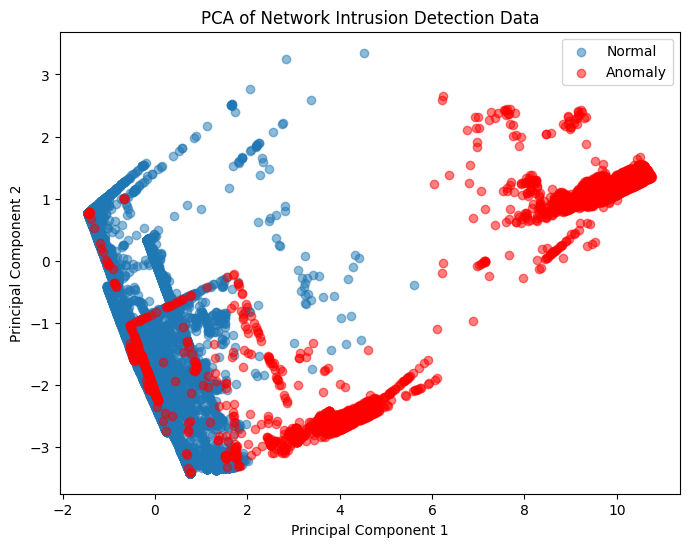

In [22]:
# 利用 PCA 進行降維，繪製降維後的數據分佈圖表，正常與異常連線以不同顏色標示出來
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[y_train == 0, 0], X_reduced[y_train == 0, 1], label='Normal', alpha=0.5)
plt.scatter(X_reduced[y_train == 1, 0], X_reduced[y_train == 1, 1], label='Anomaly', alpha=0.5, color='r')
plt.title('PCA of Network Intrusion Detection Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## 3D PCA 視覺化

除了 2D 降維外，也可以用 3D PCA 進行更進一步的資料分佈觀察。
這有助於理解資料在高維空間中的分群情形，並觀察正常與異常樣本的分布是否有明顯區隔。

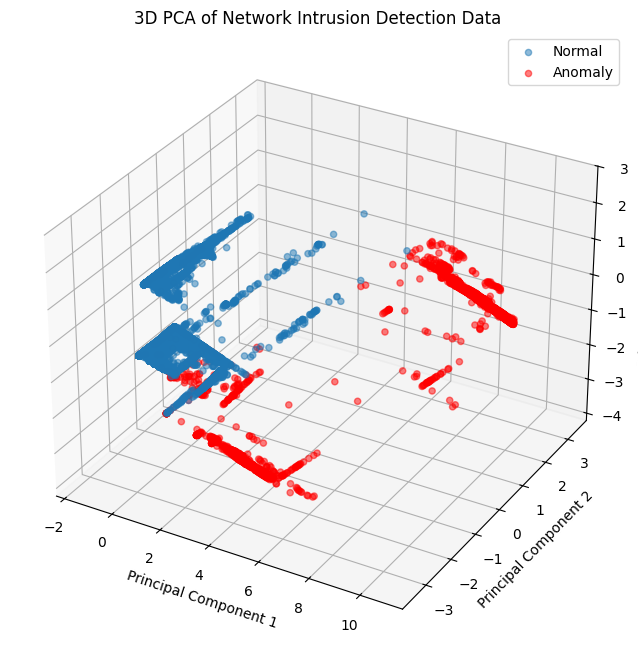

In [30]:
# 使用 3D PCA 繪製降維後的數據分佈圖表
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_reduced_3d = pca.fit_transform(X_train_scaled)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduced_3d[y_train == 0, 0], X_reduced_3d[y_train == 0, 1], X_reduced_3d[y_train == 0, 2], label='Normal', alpha=0.5)
ax.scatter(X_reduced_3d[y_train == 1, 0], X_reduced_3d[y_train == 1, 1], X_reduced_3d[y_train == 1, 2], label='Anomaly', alpha=0.5, color='r')
ax.set_title('3D PCA of Network Intrusion Detection Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

In [31]:
# 利用 IsolationForest 訓練異常檢測模型
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(
  contamination=0.1,
  random_state=42
)
iso_forest.fit(X_train_scaled)

# 在測試集上進行異常檢測
y_pred = iso_forest.predict(X_test_scaled)
# IsolationForest 的預測結果為 1（正常）和 -1（異常）
# 將預測結果轉換為 0（正常）和 1（異常）
y_pred = [0 if pred == 1 else 1 for pred in y_pred]

In [32]:
# 計算準確率、召回率和 F1 分數
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n=== 測試集異常檢測性能指標 ===")
print(f"準確率: {accuracy:.4f}")
print(f"精確率: {precision:.4f}")
print(f"召回率: {recall:.4f}")
print(f"F1 分數: {f1:.4f}")



=== 測試集異常檢測性能指標 ===
準確率: 0.9838
精確率: 0.9217
召回率: 0.9133
F1 分數: 0.9175


In [33]:
# 利用 AutoEncoder 訓練異常檢測模型
from pyod.models.auto_encoder import AutoEncoder

# 建立 AutoEncoder 模型
model = AutoEncoder(
  hidden_neuron_list=[8, 4, 4, 8],
  epoch_num=30,
  batch_size=32,
  contamination=0.1,
  verbose=0
)

# 使用標準化後的數據進行訓練
model.fit(X_train_scaled)

# 在測試集上進行異常檢測
y_pred = model.predict(X_test_scaled)

In [34]:
# 計算準確率、召回率和 F1 分數
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n=== 測試集異常檢測性能指標 ===")
print(f"準確率: {accuracy:.4f}")
print(f"精確率: {precision:.4f}")
print(f"召回率: {recall:.4f}")
print(f"F1 分數: {f1:.4f}")


=== 測試集異常檢測性能指標 ===
準確率: 0.9829
精確率: 0.9171
召回率: 0.9087
F1 分數: 0.9129
